<a href="https://colab.research.google.com/github/59822/Discrete_distribution/blob/main/911_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mchirico/montcoalert")

print("Path to dataset files:", path)

100%|██████████| 24.2M/24.2M [00:00<00:00, 28.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mchirico/montcoalert/versions/32


In [3]:
import shutil
import os

filename = os.path.basename(path)
destiny = '/content/' + filename

if not os.path.exists(destiny):
  shutil.move(path, destiny)
  print("Was moved!")
else:
  print("File is already in road!")


Was moved!


Let's start with ECD!


In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"/content/32/911.csv")
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1


In [8]:
df.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [ ]:
# Lat : Latitud
# timeStamp : YYYY-MM-DD HH:MM:SS
# twp : Municipio
# e : No sirve XD


In [9]:
df = df.drop('e', axis=1)
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST


In [10]:
df.columns


Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr'], dtype='object')

In [29]:
zip_frequent = df.groupby('zip')['zip'].count().sort_values(ascending=False).head(10)
zip_frequent

,zip
zip,
19401.0,45606
19464.0,43910
19403.0,34888
19446.0,32270
19406.0,22464
19002.0,21070
19468.0,18939
19046.0,17886
19454.0,17661


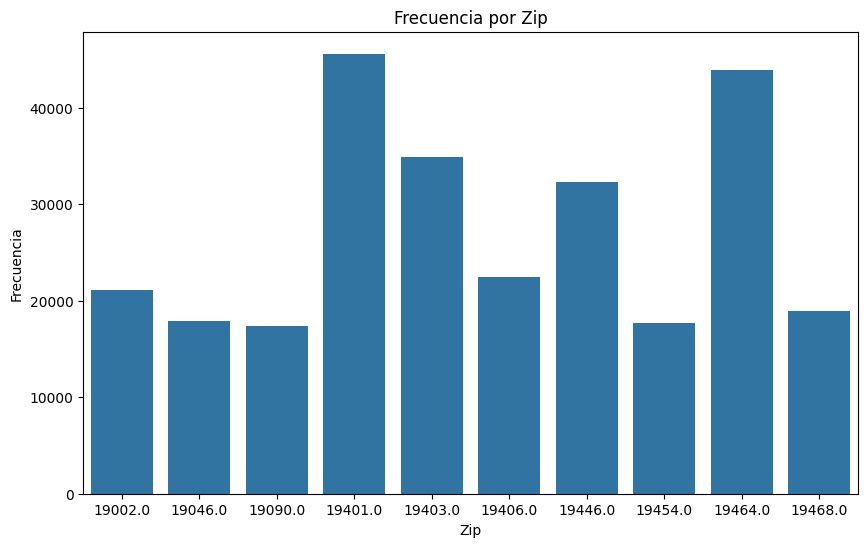

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(zip_frequent )
plt.title("Frecuencia por Zip")
plt.xlabel("Zip")
plt.ylabel("Frecuencia")

plt.show()

In [32]:
# Modelar la cantidad de llamadas que se recibiran en cierto intervalo de 19403.0


In [33]:
filtered_df = df[df['zip'] == 19401.0]
filtered_df

,lat,lng,desc,zip,title,timeStamp,twp,addr
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
18,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; Station 308A; ...,19401.0,EMS: VEHICLE ACCIDENT,2015-12-10 17:43:29,NORRISTOWN,PENN ST & ARCH ST
20,40.114239,-75.338508,PENN ST & ARCH ST; NORRISTOWN; 2015-12-10 @ 17...,19401.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:43:45,NORRISTOWN,PENN ST & ARCH ST
32,40.129398,-75.332213,PINE ST & W ROBERTS ST; NORRISTOWN; Station 3...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2015-12-10 18:17:07,NORRISTOWN,PINE ST & W ROBERTS ST
...,...,...,...,...,...,...,...,...
663471,40.121419,-75.356817,AIRY ST & HURST ALY; NORRISTOWN; 2020-07-29 @ ...,19401.0,Fire: FIRE INVESTIGATION,2020-07-29 13:31:40,NORRISTOWN,AIRY ST & HURST ALY
663474,40.113372,-75.341397,MAIN ST & GREEN ST; NORRISTOWN; Station 308A;...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2020-07-29 13:33:17,NORRISTOWN,MAIN ST & GREEN ST
663481,40.115375,-75.341525,AIRY ST & DEKALB ST; NORRISTOWN; Station 308A...,19401.0,EMS: UNKNOWN MEDICAL EMERGENCY,2020-07-29 14:13:09,NORRISTOWN,AIRY ST & DEKALB ST
663500,40.119456,-75.321759,NEW HOPE ST & LINDA LN; NORRISTOWN; 2020-07-29...,19401.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:13:44,NORRISTOWN,NEW HOPE ST & LINDA LN


In [35]:
# Distribucion poisson

filtered_df.dtypes

,0
lat,float64
lng,float64
desc,object
zip,float64
title,object
timeStamp,object
twp,object
addr,object


In [36]:
filtered_df['timeStamp'] = pd.to_datetime(filtered_df['timeStamp'])
filtered_df.dtypes

<ipython-input-36-a2efff3204fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['timeStamp'] = pd.to_datetime(filtered_df['timeStamp'])


,0
lat,float64
lng,float64
desc,object
zip,float64
title,object
timeStamp,datetime64[ns]
twp,object
addr,object


In [41]:
hourly_counts = filtered_df.groupby(filtered_df['timeStamp'].dt.hour)['timeStamp'].count()
#dt.hour = Extrae la hora
poisson_rate = hourly_counts.mean()
print(poisson_rate)

1900.25


In [45]:
hourly_counts

,timeStamp
timeStamp,
0,1300
1,1104
2,962
3,891
4,778
5,887
6,1135
7,1555
8,2058


In [44]:
import scipy.stats as stats

probability = stats.poisson.pmf(10, poisson_rate)
probability

0.0